# Combinar R y Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importar librerias para trabajar con R
import rpy2
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [3]:
# Crear un ambiente de R (Dentro de las comillas debemos poner la sintaxis de R)
####Ejemplo de la creación de una función

codigo_r = """

saludar <- function(cadena){
return(paste("Hola,",cadena))
}

"""

In [4]:
# Llamar a R y se pasa el código de R a ejecutar (Ejecuta el código en R)
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x0000025A829FA7C8 / R:0x0000025A876B0200>

In [5]:
# Ejecutar el código con Python
saludar_py = ro.globalenv['saludar']
saludar_py

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x0000025A86F36CC8 / R:0x0000025A876B0200>

In [6]:
res = saludar_py('Antonio Banderas')  # LLama a la función
res  # Del resultado de la función (Al ser un string), solo buscar el primer valor

"'Hola, Antonio Banderas'"


In [7]:
type(res)

rpy2.robjects.vectors.StrVector

In [8]:
# imprime el código de la función
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola,", cadena))
}


# Ejercicios con R

In [9]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [10]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [11]:
# La representación en r, se ejecuta con el comando r_repr()
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [12]:
# Utilizar "global environment"

ro.globalenv['var_to_r'] = var_from_python #<- Pasar a R código de Python


In [13]:
# Imprimir la variable en R
ro.r('var_to_r')

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [14]:
ro.r('sum(var_to_r)')

array([118.])

In [15]:
ro.r('mean(var_to_r)')

array([2.95])

In [16]:
ro.r('sd(var_to_r)')

array([1.16904519])

In [17]:
# Ejecutar en Python para comparar
round(np.sum(var_from_python),2)

118.0

In [18]:
# Ejecutar en Python para comparar
round(np.mean(var_from_python),2)

2.95

In [19]:
# Crear un histográma en R (arroja todos los datos que necesitas)
#ro.r('hist(var_to_r, breaks = 4)') # Los gráficos se muestran en una ventana adicional

# Instalar un paquete de R en Python

In [20]:
from rpy2.robjects.packages import importr   # Sirve para importar paquetes de R

In [21]:
# Comando para instalar paquetes
ro.r("install.packages('extRemes')")

rpy2.rinterface.NULL

In [22]:
# Comando para asignar la librería a una variable
extremes = importr('extRemes')  # Equivale a "library" en R

In [23]:
# Al seleccionar extremes, ya aparecen todos los métodos
extremes.fevd
fevd = extremes.fevd

In [24]:
# Accede a la documentación de R
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x0000025A8DB41540 / R:0x0000025A8ECF8FE0>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

# Ejercicio

In [25]:
import pandas as pd
import sys

In [26]:
# Importar dataset con Python
data = pd.read_csv('G:/BD/GitHub/mlearningcourse/datasets/time/time_series.txt',
                  sep = "\s+",  #Busca todos los espacios en blanco
                  skiprows = 1, 
                  parse_dates = [[0,1]],
                  names = ["date","time","wind_speed"],
                  index_col = 0,
                  engine = 'python')


In [27]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [28]:
# Deja el maximo / minimo o promedio de veliocidad de viento para cada fecha
max_ws= data.wind_speed.groupby(pd.Grouper(freq = 'A')).max()  # Agrupar frecuencia (A = anual)
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

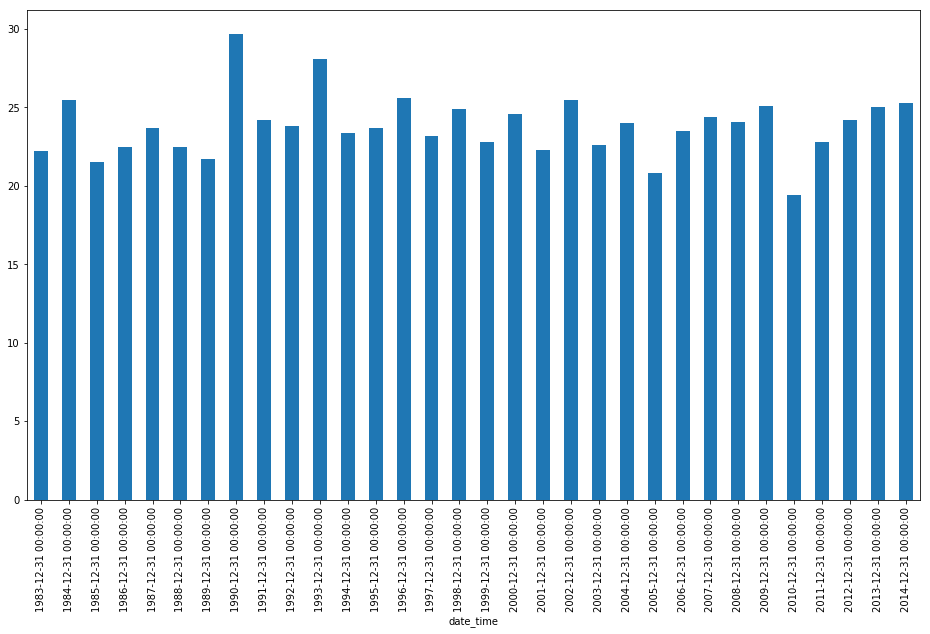

In [29]:
# Imprime gráfico 
max_ws.plot(kind = 'bar',
           figsize = (16,9))

In [30]:
# Imprimir valores con librería de R
result = fevd(max_ws.values, 
             type = 'GEV',  # Generalized Likelihod Estimator
             method = 'GMLE') # Generalized Maximun Likelihood Estimator

In [31]:
# Conjunto de resultados de la librería
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x0000025A8013A7C8 / R:0x0000025A88D2C560>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x0000025A8F1DCD48 / R:0x0000025A875874F0>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000025A82E3D308 / R:0x0000025A887E3FA0>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000025A8F502E48 / R:0x0000025A8DF389D0>
[1.000000]
  in.data: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000025A8F1C4FC8 / R:0x0000025A83

In [32]:
# Nombres de las columnas de los resultados (Ya se presenta en formato R)
print(result.names)

 [1] "call"            "data.name"       "weights"         "in.data"        

 [5] "x"               "priorFun"        "priorParams"     "method"         

 [9] "type"            "period.basis"    "par.models"      "const.loc"      

[13] "const.scale"     "const.shape"     "n"               "na.action"      

[17] "parnames"        "results"         "initial.results"



In [33]:
# Acceder a alguna de las variables anteriores
res = result.rx('results')
print(res)

$results

$results$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$results$value

[1] 1e+16



$results$counts

function gradient 

       1        1 



$results$convergence

[1] 0



$results$message

NULL



$results$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$results$num.pars

$results$num.pars$location

[1] 1



$results$num.pars$scale

[1] 1



$results$num.pars$shape

[1] 1









In [34]:
loc, scale, shape = res[0].rx('par')[0]
loc, scale, shape

(23.06394151991562, 1.7576912874286912, -0.1628816367715244)

# Interacción mágica con R

In [36]:
#Interacción mágica con R 
%load_ext rpy2.ipython
%load_ext rmagic

In [84]:
%R -n myData<-read.csv('G:/BD/GitHub/mlearningcourse/datasets/iris/iris.csv') 
